## **Introduction**
In this analysis, I have explored the dataset containing information on vessel counts and CO2 emissions across three years: 2022, 2023, and 2024 for the month of April. There are **271238 rows** in the dataset. The objective is to identify trends, distributions, and changes in these metrics over time. By leveraging statistical and visual methods, I aim to derive meaningful insights and provide a comprehensive understanding of the data.

### **Assumptions for the Entire Analysis**

*   The dataset is assumed to be accurate and comprehensive.
*   No missing values significantly impacting the analysis.
*   The data is representative of the population and time period it covers.
*   External factors affecting vessel counts and emissions are constant or negligible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim  # Import Nominatim geocoder

In [2]:
import pandas as pd

# Load the dataset from the specific sheet "rawdata"
file_path = '/MyDataset.xlsx'
df = pd.read_excel(file_path, sheet_name='RawData')

In [3]:
df.isnull().sum()

geohash                            0
Qty_vessels_2022                   0
Qty_vessels_2023                   0
Qty_vessels_2024                   0
c02_emissions_2022                 0
c02_emissions_2023                 0
c02_emissions_2024                 0
Pctg_Emissions_2022_Vs_2023        0
Pctg_Emissions_2023_Vs_2024    28216
wkt                                0
dtype: int64

➡ This shows that **28216** values in the column *Pctg_Emissions_2023_Vs_2024* are null.

In [4]:
# Display basic information about the dataset
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271238 entries, 0 to 271237
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geohash                      271238 non-null  object 
 1   Qty_vessels_2022             271238 non-null  int64  
 2   Qty_vessels_2023             271238 non-null  int64  
 3   Qty_vessels_2024             271238 non-null  int64  
 4   c02_emissions_2022           271238 non-null  float64
 5   c02_emissions_2023           271238 non-null  float64
 6   c02_emissions_2024           271238 non-null  float64
 7   Pctg_Emissions_2022_Vs_2023  271238 non-null  float64
 8   Pctg_Emissions_2023_Vs_2024  243022 non-null  float64
 9   wkt                          271238 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 20.7+ MB
None


In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicates)


Duplicate Rows:
0


I did not find any duplicate rows in the given dataset.

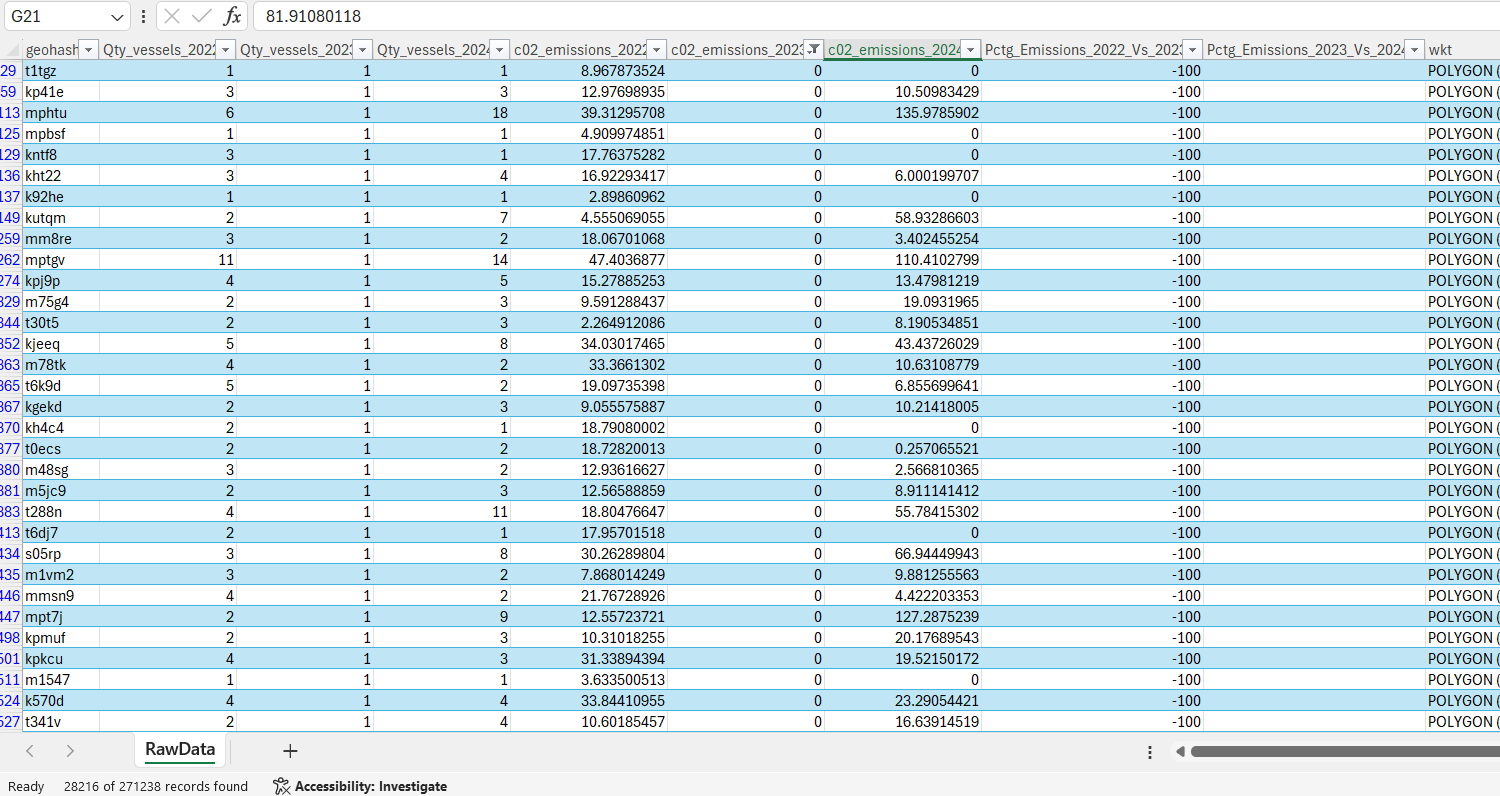

➡ There could be several reasons for **28216** values being **0** in the *c02_emissions_2023* column:

**Data Collection Methodology:** The zeros might indicate areas where no emissions were recorded due to the absence of monitoring equipment or deliberate exclusion in the data collection process.

**Measurement Thresholds:** Emissions below a certain threshold might be recorded as zero. This could be due to the precision of the measuring instruments or reporting standards.

**Seasonal or Operational Shutdowns:** Certain locations might have had no emissions during specific periods due to shutdowns of industrial activities, reduced operations, or seasonal closures.

**Data Entry Errors:** Zeros might be present due to data entry errors, missing data being incorrectly replaced with zeros, or issues in data processing.

**Natural Emission Levels:** In some regions, natural emissions could inherently be zero or very low, particularly in non-industrial areas or regions with effective emission control measures.

**Reporting Standards:** The dataset might have a standard where missing or unrecorded data is represented as zero.


## **Analyses and Explanations**

### **1. Descriptive Statistics**

**Methodology:**
I began my analysis with descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset’s distribution.

**Explanation:**
Descriptive statistics offer a simple summary about the sample and the measures. The central tendency (mean, median) gives us an average value, while the dispersion (standard deviation, variance) shows us the spread of the data.

**Assumptions:**
*   The data is assumed to be accurate and representative of the population.
*   No significant outliers are assumed to distort the measures of central tendency.

In [6]:
# Summary statistics to check for any anomalies
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Qty_vessels_2022,Qty_vessels_2023,Qty_vessels_2024,c02_emissions_2022,c02_emissions_2023,c02_emissions_2024,Pctg_Emissions_2022_Vs_2023,Pctg_Emissions_2023_Vs_2024
count,271238.000000,271238.000000,271238.000000,271238.000000,271238.000000,271238.000000,271238.000000,2.430220e+05
mean,14.891792,15.879781,28.158407,117.410697,119.056558,229.463580,53.505371,3.634968e+02
std,40.741093,46.031393,63.271073,373.262770,381.213865,586.183310,1101.908751,9.247017e+03
min,1.000000,1.000000,1.000000,0.019140,0.000000,0.000000,-100.000000,-1.000000e+02
25%,3.000000,3.000000,5.000000,11.927710,9.939541,24.356133,-53.018853,1.160574e+01
50%,5.000000,6.000000,11.000000,31.758911,32.180022,75.098193,-6.380406,1.174063e+02
75%,12.000000,12.000000,27.000000,92.003956,92.333361,224.560354,54.792911,2.967791e+02
max,1465.000000,1808.000000,2169.000000,53060.348430,28327.144030,62885.305390,282893.989500,3.852202e+06


➡ The mean of the vessels quantity doubled from 2022 to 2024. The same can also be seen for the CO2 emissions.

➡ The max value for CO2 emissions in 2023 is half of what it was in the year 2022.

In [7]:
import geopandas as gpd
from shapely import wkt

# Convert WKT to geometry
df['geometry'] = df['wkt'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

gdf.head()

,geohash,Qty_vessels_2022,Qty_vessels_2023,Qty_vessels_2024,c02_emissions_2022,c02_emissions_2023,c02_emissions_2024,Pctg_Emissions_2022_Vs_2023,Pctg_Emissions_2023_Vs_2024,wkt,geometry
0,kdyfp,37,44,63,191.624862,218.697400,493.144696,14.127884,125.491797,"POLYGON ((32.2998047 -29.1796875, 32.2998047 -...","POLYGON ((32.29980 -29.17969, 32.29980 -29.135..."
1,kdzyb,25,28,52,151.940106,129.905790,560.807735,-14.501975,331.703417,"POLYGON ((33.3984375 -28.3447266, 33.3984375 -...","POLYGON ((33.39844 -28.34473, 33.39844 -28.300..."
2,k9vru,17,10,32,122.097231,64.889954,336.752635,-46.853869,418.959583,"POLYGON ((30.0585938 -33.7939453, 30.0585938 -...","POLYGON ((30.05859 -33.79395, 30.05859 -33.750..."
3,sq8gq,32,27,93,340.212701,259.155006,486.149349,-23.825593,87.590183,"POLYGON ((12.5683594 37.1337891, 12.5683594 37...","POLYGON ((12.56836 37.13379, 12.56836 37.17773..."
4,k9ek8,3,4,8,49.889511,10.145234,41.585330,-79.664595,309.900140,"POLYGON ((27.0703125 -35.7714844, 27.0703125 -...","POLYGON ((27.07031 -35.77148, 27.07031 -35.727..."


In [8]:
#pip install pandas matplotlib geopandas python-docx


In [9]:
sns.set()  # Resets to seaborn default style
plt.rcdefaults()  # Resets to matplotlib default style

### **2. Geospatial Analysis**
**Methodology:**
We use geospatial analysis to visualize the distribution of vessels and emissions geographically. This involves plotting points on a map based on latitude and longitude.

**Explanation:**
Geospatial analysis helps in identifying geographical patterns and hotspots. By visualizing vessel counts and emissions on a map, we can see if certain areas have higher activity or emissions than others.

**Assumptions:**


*   The coordinates provided in the dataset are accurate.
*   The map used covers the relevant geographical area comprehensively.


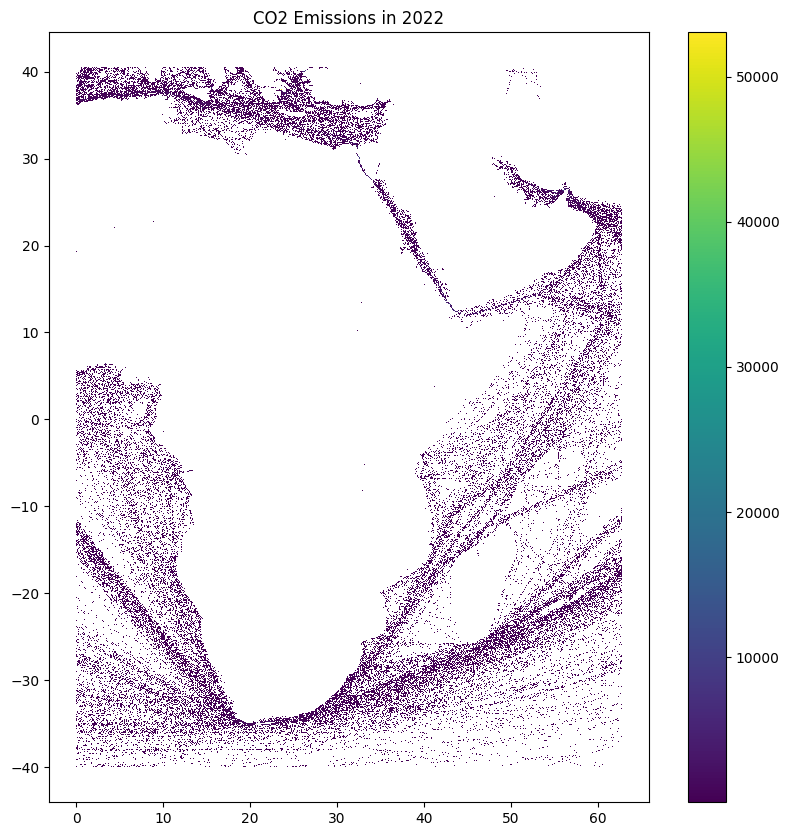

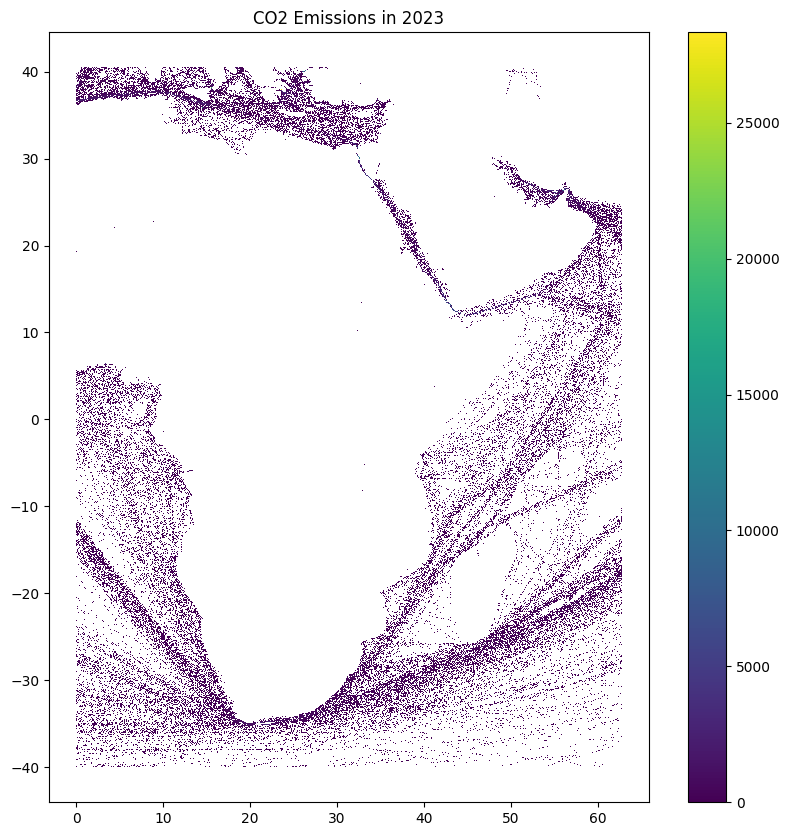

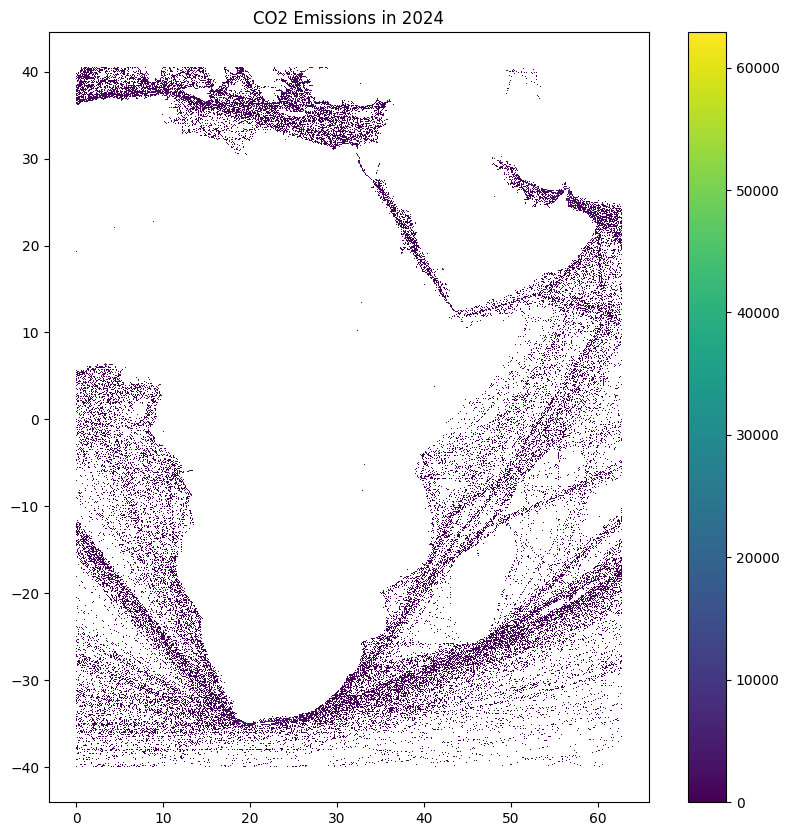

In [10]:
# Plot geospatial data
gdf.plot(column='c02_emissions_2022', legend=True, figsize=(10, 10))
plt.title('CO2 Emissions in 2022')
plt.show()

gdf.plot(column='c02_emissions_2023', legend=True, figsize=(10, 10))
plt.title('CO2 Emissions in 2023')
plt.show()

gdf.plot(column='c02_emissions_2024', legend=True, figsize=(10, 10))
plt.title('CO2 Emissions in 2024')
plt.show()

These maps show the geospatial distribution of CO2 emissions over the regions for the years 2022, 2023, and 2024. Each point represents a location where CO2 emissions were recorded, and each map uses a color gradient to represent the intensity of CO2 emissions, with higher values indicated by brighter colors.

There appears to be a reduction in the maximum emission values in 2023 as compared to 2022, as indicated by the color scale, which peaks at a lower value. However, there is a noticeable increase in the maximum emission values in 2024, as the color scale now peaks at a higher value.

The reduction in peak values in 2023 could indicate the effectiveness of emission reduction measures or changes in shipping activity.

The increase in 2024 might suggest a resurgence in shipping activities or a possible relaxation of emission controls.

### **Comparative Analysis**

**Consistency:** Across all three years, the emission patterns remain consistent.

**Trends:**

➡ There is a notable decrease in the 'maximum' values of emissions from 2022 to 2023, followed by an increase in 2024.

➡ Overall, the total emissions slightly increased in 2023. However, there is a significant increase in emissions in 2024. This is because of number of vessels increased significantly from 2023 to 2024.

**Implications:** Understanding these patterns is crucial for policymakers and environmental agencies to target emission reduction efforts effectively. The observed trends highlight the need for sustained and possibly more stringent measures to control CO2 emissions in maritime activities.

### **3. Correlation Analysis**

**Methodology:**
We calculate the correlation matrix to determine the relationships between vessel counts, CO2 emissions, and other relevant variables.

**Explanation:**
Correlation analysis helps in identifying how variables are related. Positive correlation indicates that as one variable increases, the other tends to increase, and vice versa.

**Assumptions:**



*   The relationships between variables are linear.
*   The data is free from significant outliers that can skew the correlation.

In [11]:
# Correlation between Qty_vessels and c02_emissions for each year
corr_2022 = df['Qty_vessels_2022'].corr(df['c02_emissions_2022'])
corr_2023 = df['Qty_vessels_2023'].corr(df['c02_emissions_2023'])
corr_2024 = df['Qty_vessels_2024'].corr(df['c02_emissions_2024'])

print(f'Correlation in 2022: {corr_2022}')
print(f'Correlation in 2023: {corr_2023}')
print(f'Correlation in 2024: {corr_2024}')


Correlation in 2022: 0.9219424341815772
Correlation in 2023: 0.9428580079000095
Correlation in 2024: 0.8303382381875465


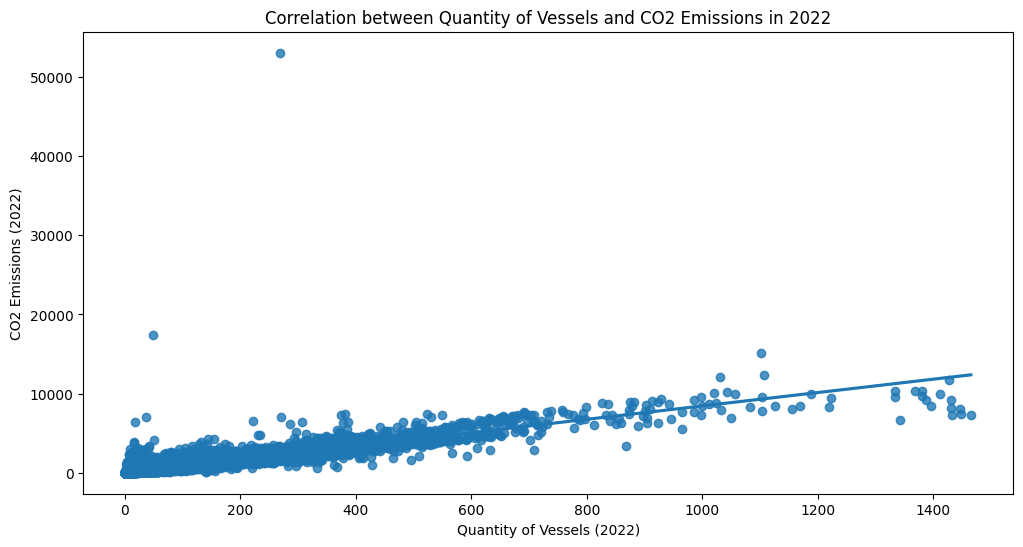

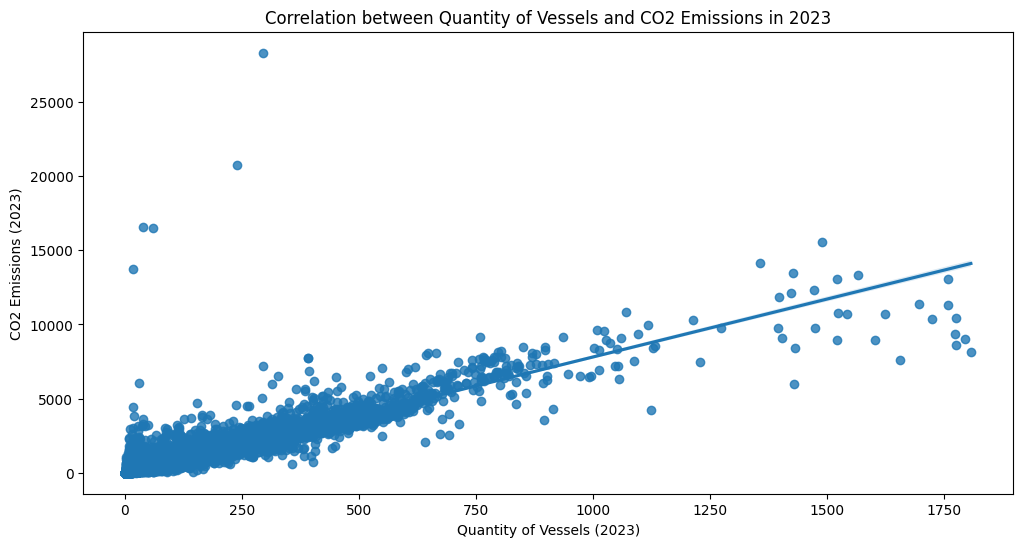

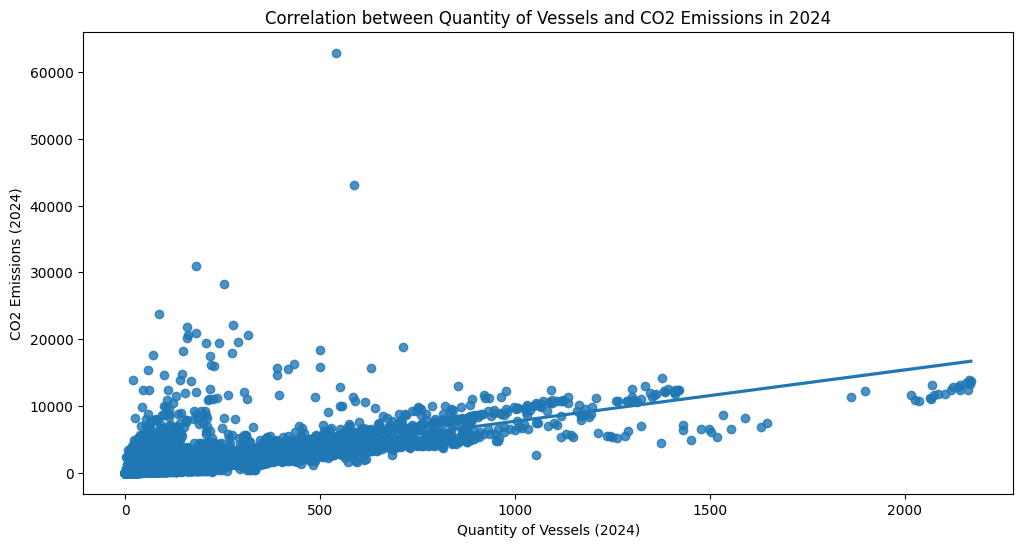

In [12]:
# Correlation Plots
plt.figure(figsize=(12, 6))
sns.regplot(x='Qty_vessels_2022', y='c02_emissions_2022', data=df)
plt.xlabel('Quantity of Vessels (2022)')
plt.ylabel('CO2 Emissions (2022)')
plt.title('Correlation between Quantity of Vessels and CO2 Emissions in 2022')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='Qty_vessels_2023', y='c02_emissions_2023', data=df)
plt.xlabel('Quantity of Vessels (2023)')
plt.ylabel('CO2 Emissions (2023)')
plt.title('Correlation between Quantity of Vessels and CO2 Emissions in 2023')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='Qty_vessels_2024', y='c02_emissions_2024', data=df)
plt.xlabel('Quantity of Vessels (2024)')
plt.ylabel('CO2 Emissions (2024)')
plt.title('Correlation between Quantity of Vessels and CO2 Emissions in 2024')
plt.show()

**Correlation in 2022 is 0.92**.
This value suggests a very strong positive relationship between the quantity of vessels and CO₂ emissions in 2022. As the number of vessels increased, CO₂ emissions tended to increase significantly.

**Correlation in 2023 is 0.94.**
This value is even higher, indicating an extremely strong positive relationship between the quantity of vessels and CO₂ emissions in 2023. The trend from the previous year continues, with CO₂ emissions increasing as the number of vessels increases.

**Correlation in 2024 is 0.83.**
Although still strong, this value is slightly lower compared to the previous years. It shows a strong positive relationship, but the association between the number of vessels and CO₂ emissions is not as consistent as in 2022 and 2023. There may be some variability or changes in other factors affecting CO₂ emissions in 2024.

In summary, the high correlation values across these years suggest that there is a strong and consistent relationship between the quantity of vessels and CO₂ emissions, although there is a slight decline in the strength of this relationship in 2024.

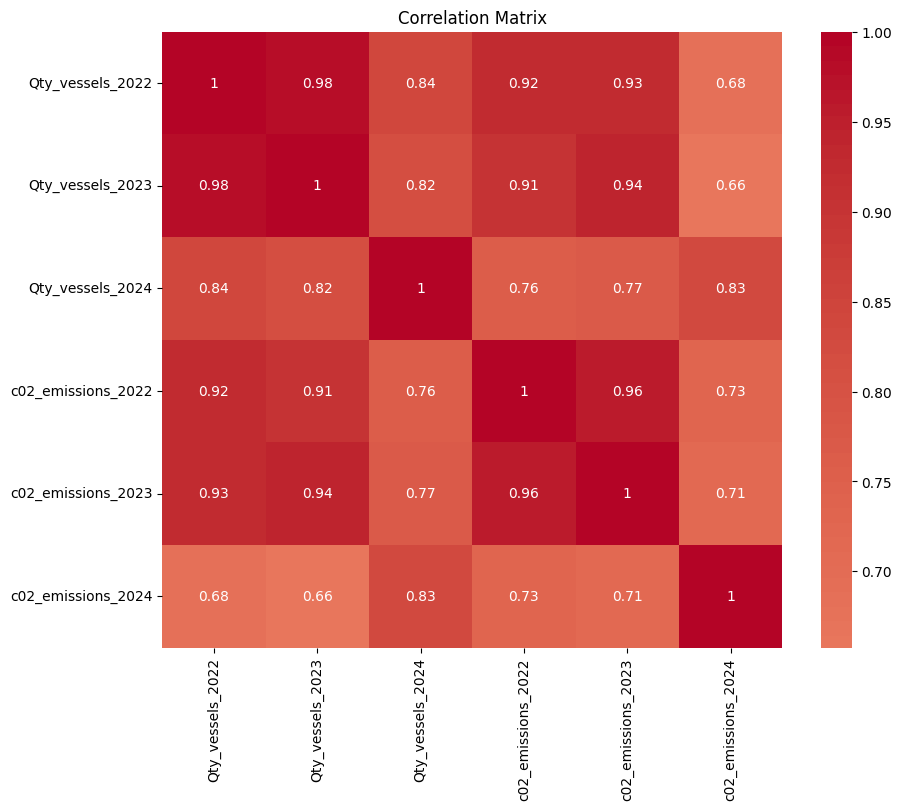

In [13]:
# Calculate correlation matrix
correlation_matrix = df[['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024',
                         'c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### **4.** **Year-over-Year Change Analysis**

**Methodology:**
We calculate the year-over-year changes in vessel counts and emissions to observe how these metrics have evolved over time.

**Explanation:**
YOY change analysis helps in understanding the growth or reduction in vessel counts and emissions from one year to the next. This is critical for identifying trends and assessing whether interventions are needed.

**Assumptions:**
*   The yearly data is consistent and comparable.
*   External factors affecting the yearly changes are constant or negligible.

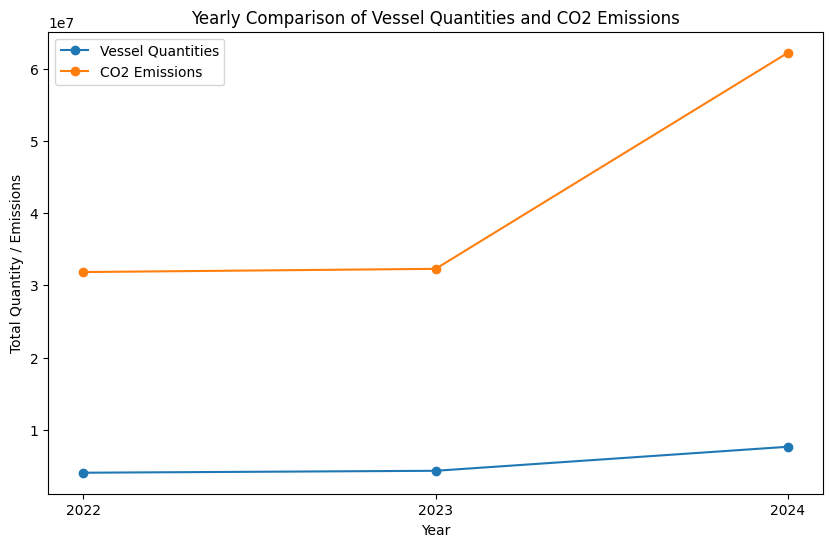

In [14]:
# Compare vessel quantities and CO2 emissions across years
years = ['2022', '2023', '2024']
vessel_quantities = [df[f'Qty_vessels_{year}'].sum() for year in years]
emissions = [df[f'c02_emissions_{year}'].sum() for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years, vessel_quantities, marker='o', label='Vessel Quantities')
plt.plot(years, emissions, marker='o', label='CO2 Emissions')
plt.legend()
plt.title('Yearly Comparison of Vessel Quantities and CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Total Quantity / Emissions')
plt.show()

The graph compares the total *quantities of vessels* and *CO2 emissions* from 2022 to 2024. The x-axis represents the years, and the y-axis shows the total quantities or emissions.

**Key Observations:**

➡ There is only a slight increase in the '*vessel quantity*' from 2022 to 2023. However, a good increase can be seen in 2024.


➡ CO2 Emissions remain stable in the year 2023 and very slight increase can be observed. However, the emissions rise significantly in 2024 (as can be seen from the graph above).

**Conclusion**

The graph shows that while the number of vessels has a slow and steady increase, CO2 emissions remain stable at first and then dramatically increase in 2024. This indicates that even with a relatively small increase in the number of vessels, CO2 emissions have risen sharply by 2024.

In [15]:
# Calculate year-over-year changes
df['YOY_vessels_2022_to_2023'] = df['Qty_vessels_2023'] - df['Qty_vessels_2022']
df['YOY_vessels_2023_to_2024'] = df['Qty_vessels_2024'] - df['Qty_vessels_2023']
df['YOY_emissions_2022_to_2023'] = df['c02_emissions_2023'] - df['c02_emissions_2022']
df['YOY_emissions_2023_to_2024'] = df['c02_emissions_2024'] - df['c02_emissions_2023']

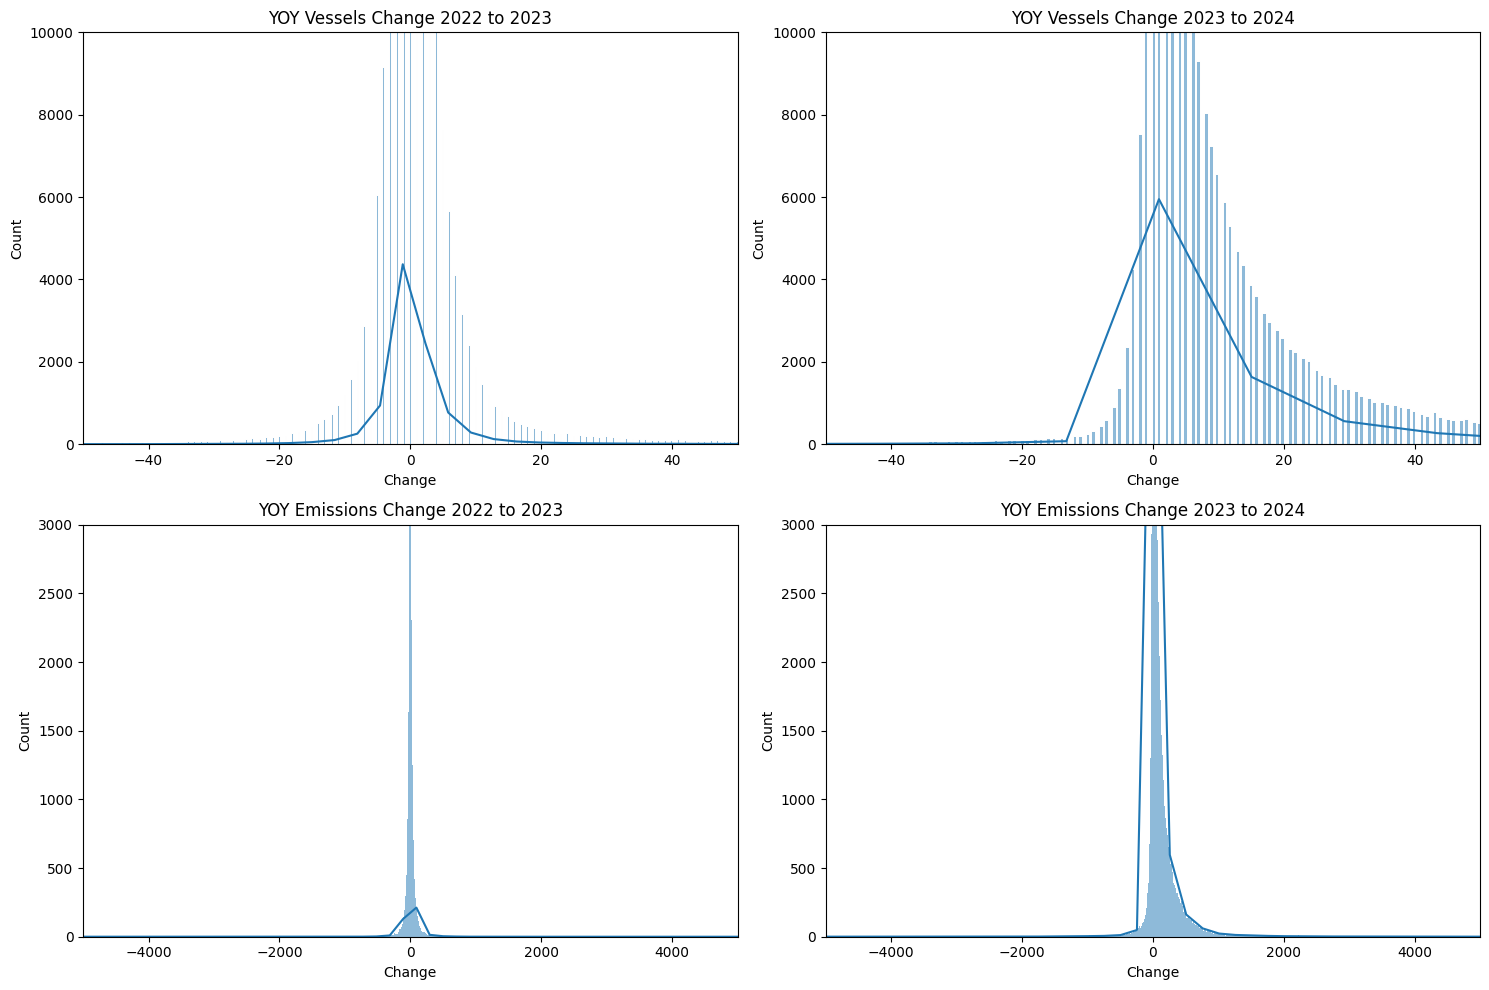

In [16]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot each Year-over-Year change with fixed axes
sns.histplot(df['YOY_vessels_2022_to_2023'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title('YOY Vessels Change 2022 to 2023')
axs[0, 0].set_xlim(-50, 50)  # Adjust as necessary
axs[0, 0].set_ylim(0, 10000)  # Adjust as necessary

sns.histplot(df['YOY_vessels_2023_to_2024'], ax=axs[0, 1], kde=True)
axs[0, 1].set_title('YOY Vessels Change 2023 to 2024')
axs[0, 1].set_xlim(-50, 50)  # Adjust as necessary
axs[0, 1].set_ylim(0, 10000)  # Adjust as necessary

sns.histplot(df['YOY_emissions_2022_to_2023'], ax=axs[1, 0], kde=True)
axs[1, 0].set_title('YOY Emissions Change 2022 to 2023')
axs[1, 0].set_xlim(-5000, 5000)  # Adjust as necessary
axs[1, 0].set_ylim(0, 3000)  # Adjust as necessary

sns.histplot(df['YOY_emissions_2023_to_2024'], ax=axs[1, 1], kde=True)
axs[1, 1].set_title('YOY Emissions Change 2023 to 2024')
axs[1, 1].set_xlim(-5000, 5000)  # Adjust as necessary
axs[1, 1].set_ylim(0, 3000)  # Adjust as necessary

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('Change')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### **5. Outlier Detection**

In [17]:
# Detect outliers using z-scores
from scipy.stats import zscore

# Calculate z-scores for emissions columns
df['zscore_emissions_2022'] = zscore(df['c02_emissions_2022'])
df['zscore_emissions_2023'] = zscore(df['c02_emissions_2023'])
df['zscore_emissions_2024'] = zscore(df['c02_emissions_2024'])

# Filter out outliers (z-score > 3 or < -3)
outliers = df[(df['zscore_emissions_2022'].abs() > 3) |
              (df['zscore_emissions_2023'].abs() > 3) |
              (df['zscore_emissions_2024'].abs() > 3)]

# Display outliers
print(outliers)

       geohash  Qty_vessels_2022  Qty_vessels_2023  Qty_vessels_2024  \
46       sn8f5               117               210               217   
54       stpk7               370               476               512   
59       k9c71               105                97               256   
92       sx40w               240               119               622   
117      sfq9v               625               797               393   
...        ...               ...               ...               ...   
271089   sp1b6                38                41                92   
271105   tj4u6               123               142               188   
271126   tk1zr               131               100               323   
271190   tj4z3               130               113               160   
271232   sfw03               298               380               227   

        c02_emissions_2022  c02_emissions_2023  c02_emissions_2024  \
46              888.905814         1479.663789         1388.98485

### **6. Trend Analysis Over Time**
Instead of calculating rolling averages, I visualized the trend over time for emissions and vessel quantities.

<Figure size 1400x800 with 0 Axes>

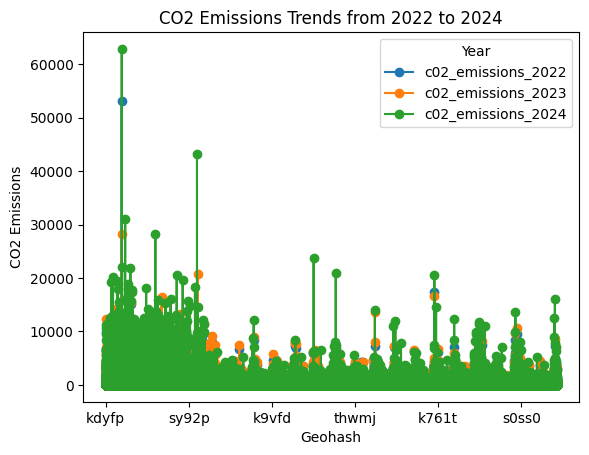

<Figure size 1400x800 with 0 Axes>

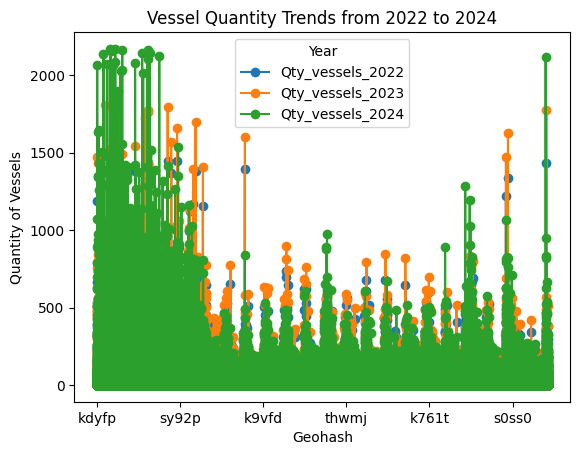

In [18]:
# Plot trends over years
plt.figure(figsize=(14, 8))
df.set_index('geohash')[['c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024']].plot(marker='o')
plt.title('CO2 Emissions Trends from 2022 to 2024')
plt.xlabel('Geohash')
plt.ylabel('CO2 Emissions')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(14, 8))
df.set_index('geohash')[['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024']].plot(marker='o')
plt.title('Vessel Quantity Trends from 2022 to 2024')
plt.xlabel('Geohash')
plt.ylabel('Quantity of Vessels')
plt.legend(title='Year')
plt.show()


The above scatter plots represent the CO2 emissions and number of vessels across different locations (denoted by geohash codes) for the years 2022, 2023, and 2024.

The key points include:

Geohash Codes: Locations are represented by unique geohash codes on the x-axis.

CO2 Emissions: The y-axis shows the amount of CO2 emissions and number of vessels respectively.

Yearly Data: Each color represents a different year (2022 in blue, 2023 in orange, and 2024 in green).

**Figure 1: CO2 Emissions Trends from 2022 to 2024**

There is a noticeable increase in CO2 emissions in 2024 across many geohash codes compared to the previous years, indicating a rising trend in emissions.

**Figure 2: Vessel Quantity Trends from 2022 to 2024**

There is a visible increase in the quantity of vessels in 2024 across many geohash codes compared to the previous years, suggesting a growing number of vessels over time.

### **7. Clustering Analysis**

Clustering was executed using three clusters. The results indicate that the clustering process was effective with these three clusters. The clusters have distinct boundaries and minimal overlaps, demonstrating that the clustering was performed correctly.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare the data for clustering
X = df[['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024',
                'c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster labels to the GeoDataFrame
gdf['cluster'] = df['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


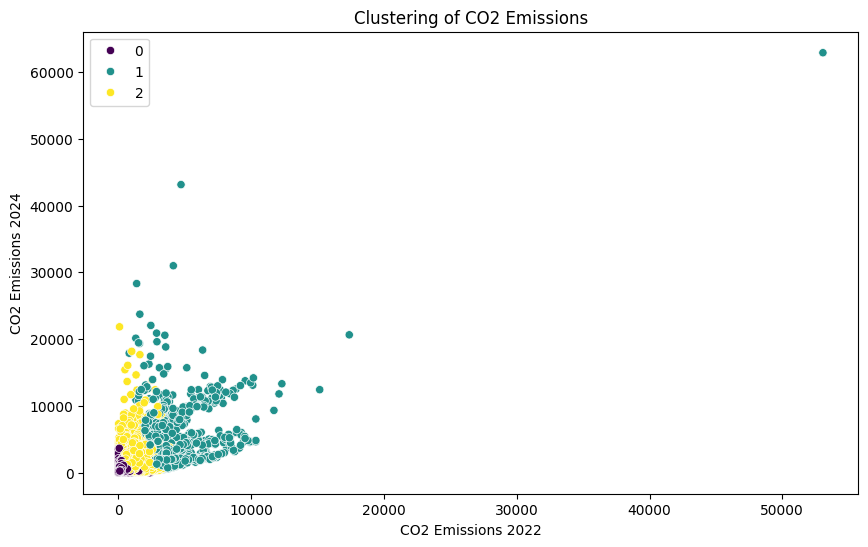

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='c02_emissions_2022', y='c02_emissions_2024', hue='cluster', data=df, palette='viridis')
plt.title('Clustering of CO2 Emissions')
plt.xlabel('CO2 Emissions 2022')
plt.ylabel('CO2 Emissions 2024')
plt.legend()
plt.show()

The above graph shows the cluster 2 (yellow) which had a smaller range of CO2 emissions in 2022 had a much bigger range (spread) in 2024.

Cluster 1 (blue) represents points with a high emission and a greater number of vessels.

### **8. Geospatial Analysis (Enhanced)**
Enhance the geospatial analysis by visualizing clusters or using a more detailed map.

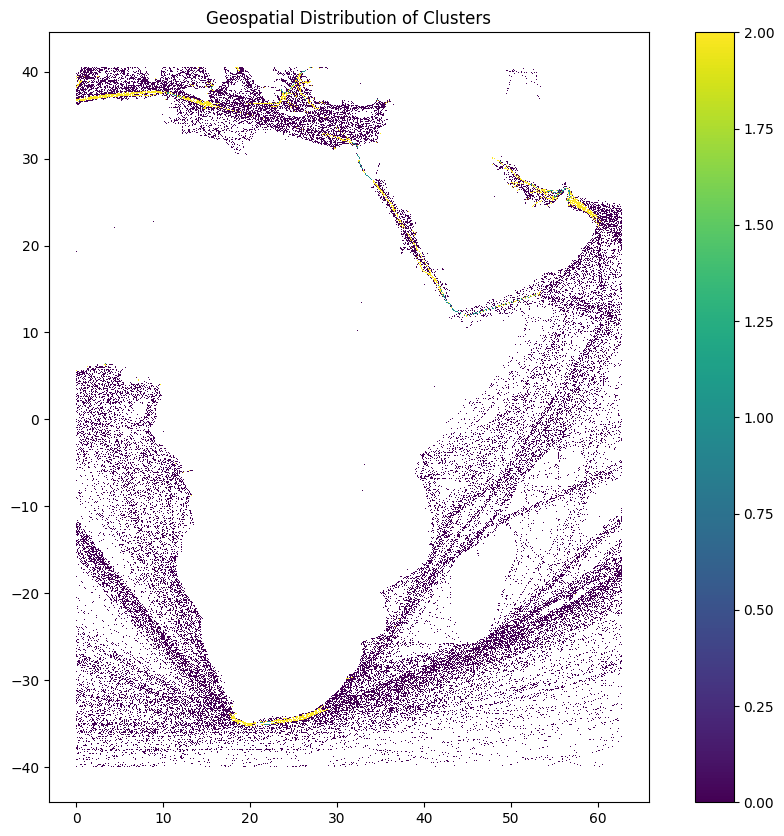

In [22]:
import geopandas as gpd

# Convert POLYGON column to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['wkt']))

# Plot the geospatial data with clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(column='cluster', ax=ax, legend=True, cmap='viridis')
plt.title('Geospatial Distribution of Clusters')
plt.show()


The image displays a geospatial distribution of clusters, likely from a clustering analysis of vessel data and CO2 emissions.

**Cluster Visualization:**
The data points are color-coded based on cluster assignments, with a color gradient ranging from purple (0) to yellow (2).

Yellow areas indicate higher cluster values (2), while purple areas represent lower values (0).

**Density:**
The density of points and the color intensity provide insights into the concentration of data points within each cluster.
Higher density regions (yellow) suggest areas with significant maritime activity or higher emissions.

**Clustering Effectiveness:**
The distinct color boundaries and minimal overlaps between different clusters suggest that the clustering has effectively grouped the data points based on their similarities.

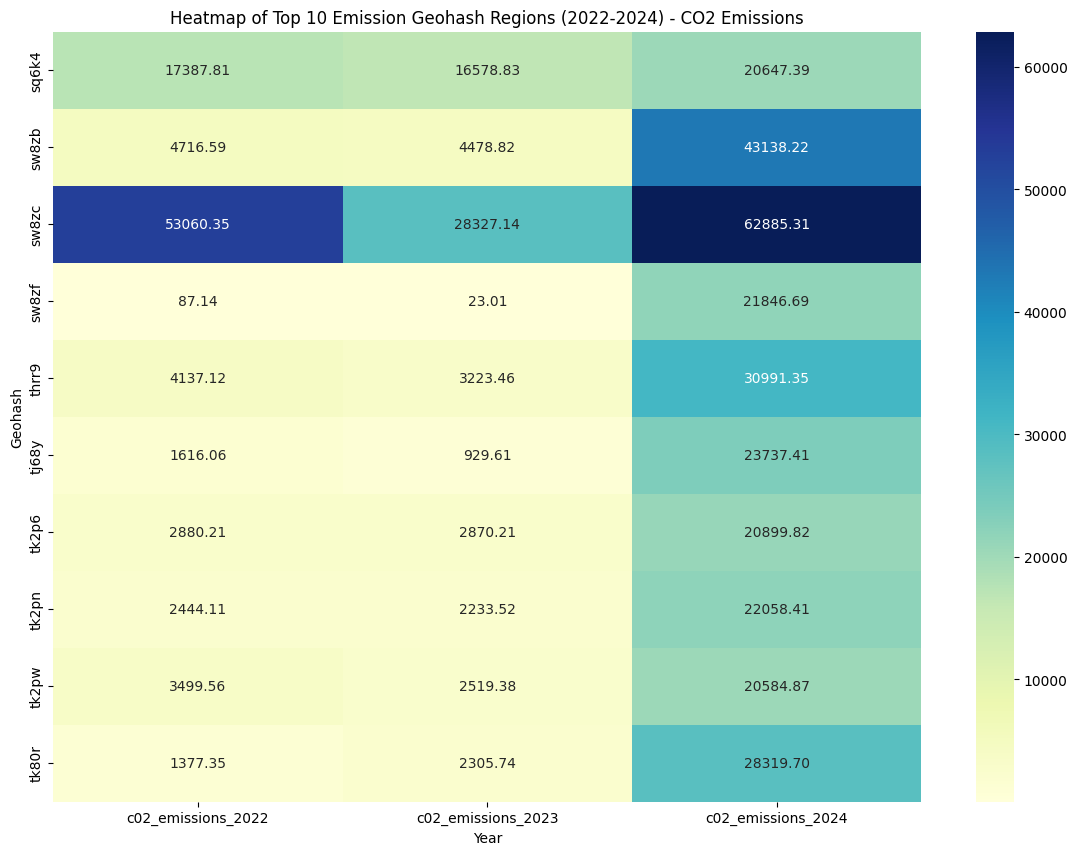

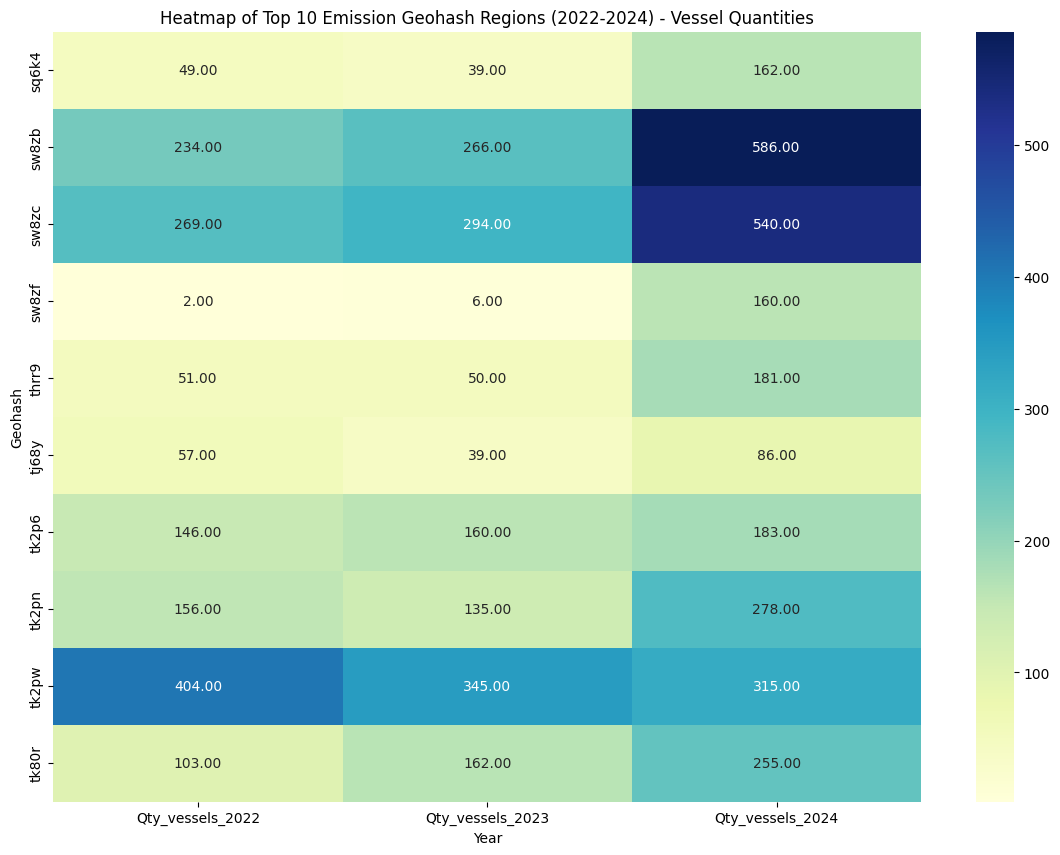

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find top 10 geohashes by total emissions in 2024
top_10 = df.nlargest(10, 'c02_emissions_2024')

# Melt the DataFrame for heatmap plotting (CO2 Emissions)
melted_top_10_emissions = top_10.melt(id_vars='geohash', value_vars=['c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024'],
                                      var_name='Year', value_name='CO2 Emissions')

# Create a pivot table for CO2 Emissions
pivot_top_10_emissions = melted_top_10_emissions.pivot(index='geohash', columns='Year', values='CO2 Emissions')

# Plot heatmap for top 10 CO2 Emissions
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_top_10_emissions, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Top 10 Emission Geohash Regions (2022-2024) - CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

# Melt the DataFrame for heatmap plotting (Vessel Quantities)
melted_top_10_vessels = top_10.melt(id_vars='geohash', value_vars=['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024'],
                                    var_name='Year', value_name='Vessel Quantities')

# Create a pivot table for Vessel Quantities
pivot_top_10_vessels = melted_top_10_vessels.pivot(index='geohash', columns='Year', values='Vessel Quantities')

# Plot heatmap for top 10 Vessel Quantities
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_top_10_vessels, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Top 10 Emission Geohash Regions (2022-2024) - Vessel Quantities')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

The above two heatmaps show the CO2 emissions and the number of vessels in the top 10 emission geohash regions from 2022 to 2024.

**Key Observations:**

➡ **Top Emitting Regions**

Regions like sw8zc and sq6k4 have significantly higher emissions (dark blue).
sw8zc has the highest emissions in all three years, especially in 2022 and 2024.

➡ **High Vessel Regions**

sw8zb and sw8zc have the highest number of vessels, especially in 2024, where sw8zb reaches 586 vessels and sw8zc has 540 vessels.

tk2pw also shows a relatively high number of vessels across the years, particularly in 2022.

**Increasing Trends:**

Regions like sw8zb, sw8zc, and tk2p6 show an increasing trend in the number of vessels over the years.

For example, sw8zb increases from 234 vessels in 2022 to 586 vessels in 2024.

**Stable or Decreasing Trends:**

Some regions, like sq6k4, thrnp, and tk2pn, show more stability or slight fluctuations in vessel numbers.

tk2pn starts with 156 vessels in 2022, decreases to 135 vessels in 2023, and then rises again to 278 vessels in 2024.

**Low Vessel Regions:**

sw8zf consistently shows the lowest number of vessels, with only 2 in 2022 and gradually increasing to 160 in 2024.

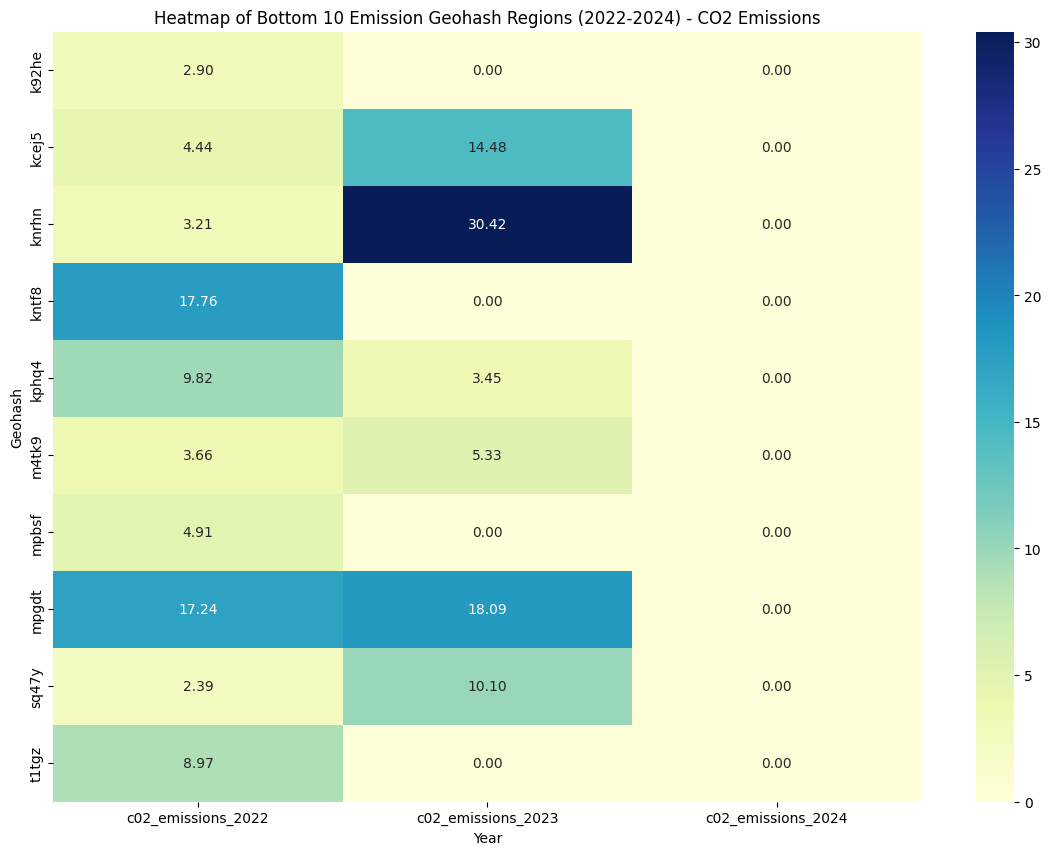

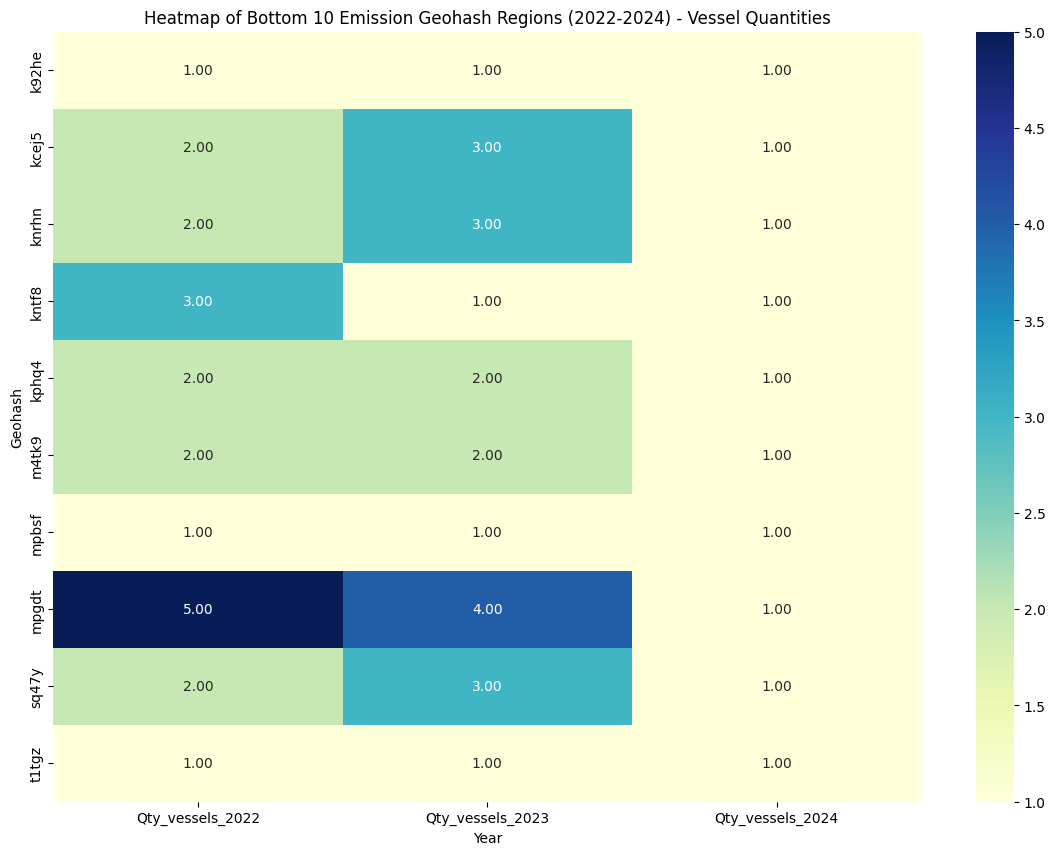

In [24]:
bottom_10 = df.nsmallest(10, 'c02_emissions_2024')

# Melt the DataFrame for heatmap plotting (CO2 Emissions)
melted_bottom_10_emissions = bottom_10.melt(id_vars='geohash', value_vars=['c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024'],
                                            var_name='Year', value_name='CO2 Emissions')

# Create a pivot table for CO2 Emissions
pivot_bottom_10_emissions = melted_bottom_10_emissions.pivot(index='geohash', columns='Year', values='CO2 Emissions')

# Plot heatmap for bottom 10 CO2 Emissions
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_emissions, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

# Melt the DataFrame for heatmap plotting (Vessel Quantities)
melted_bottom_10_vessels = bottom_10.melt(id_vars='geohash', value_vars=['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024'],
                                          var_name='Year', value_name='Vessel Quantities')

# Create a pivot table for Vessel Quantities
pivot_bottom_10_vessels = melted_bottom_10_vessels.pivot(index='geohash', columns='Year', values='Vessel Quantities')

# Plot heatmap for bottom 10 Vessel Quantities
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_vessels, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - Vessel Quantities')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

➡ **Low Emitting Regions:**

Regions like k9zhe, kcej5, and knrhn have very low emissions (light yellow).
These regions consistently show minimal or zero emissions across all three years.

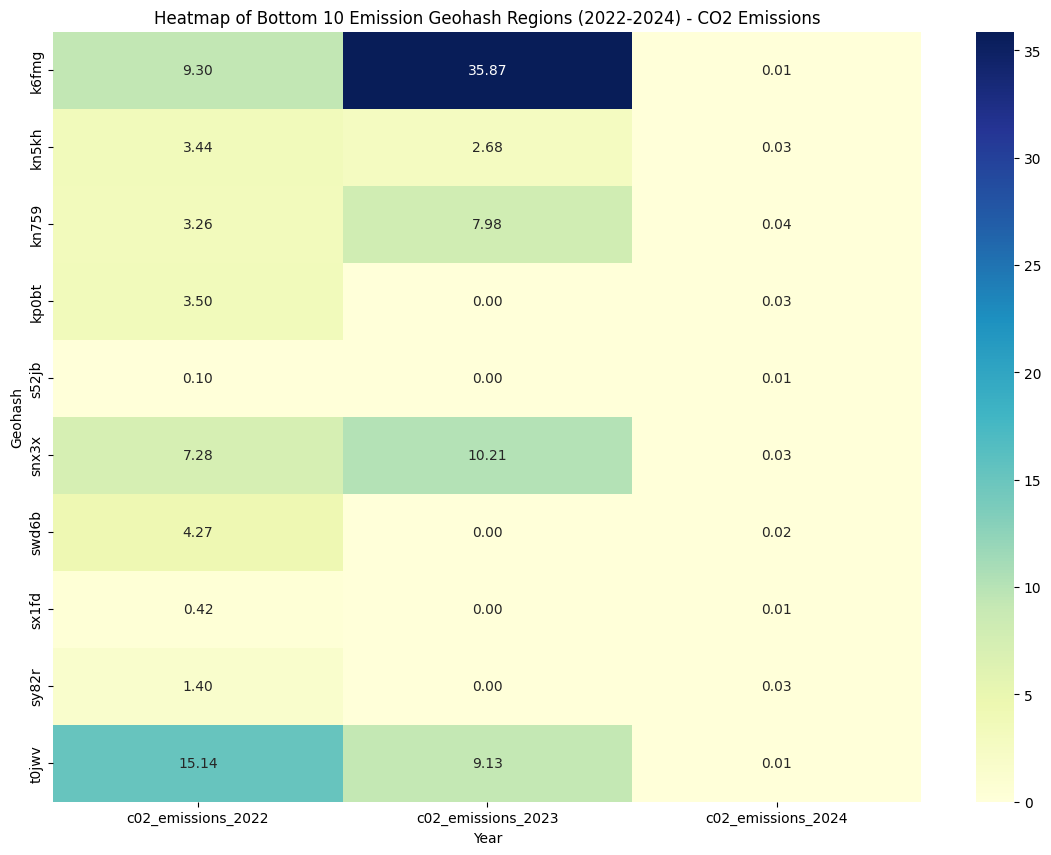

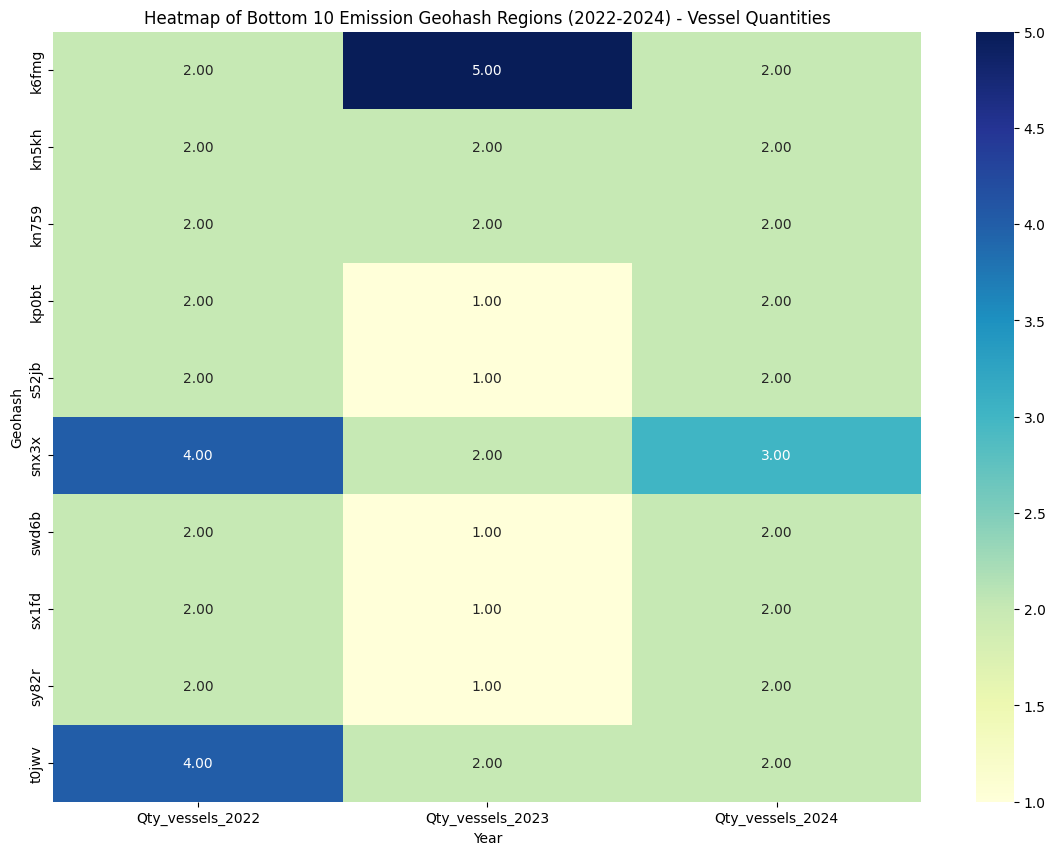

In [25]:
# Filter out geohashes where CO2 emissions are 0 in 2024
filtered_df = df[df['c02_emissions_2024'] > 0]

# Find bottom 10 geohashes by total emissions in 2024 from the filtered DataFrame
bottom_10 = filtered_df.nsmallest(10, 'c02_emissions_2024')

# Melt the DataFrame for heatmap plotting (CO2 Emissions)
melted_bottom_10_emissions = bottom_10.melt(id_vars='geohash', value_vars=['c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024'],
                                            var_name='Year', value_name='CO2 Emissions')

# Create a pivot table for CO2 Emissions
pivot_bottom_10_emissions = melted_bottom_10_emissions.pivot(index='geohash', columns='Year', values='CO2 Emissions')

# Plot heatmap for bottom 10 CO2 Emissions
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_emissions, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

# Melt the DataFrame for heatmap plotting (Vessel Quantities)
melted_bottom_10_vessels = bottom_10.melt(id_vars='geohash', value_vars=['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024'],
                                          var_name='Year', value_name='Vessel Quantities')

# Create a pivot table for Vessel Quantities
pivot_bottom_10_vessels = melted_bottom_10_vessels.pivot(index='geohash', columns='Year', values='Vessel Quantities')

# Plot heatmap for bottom 10 Vessel Quantities
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_vessels, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - Vessel Quantities')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

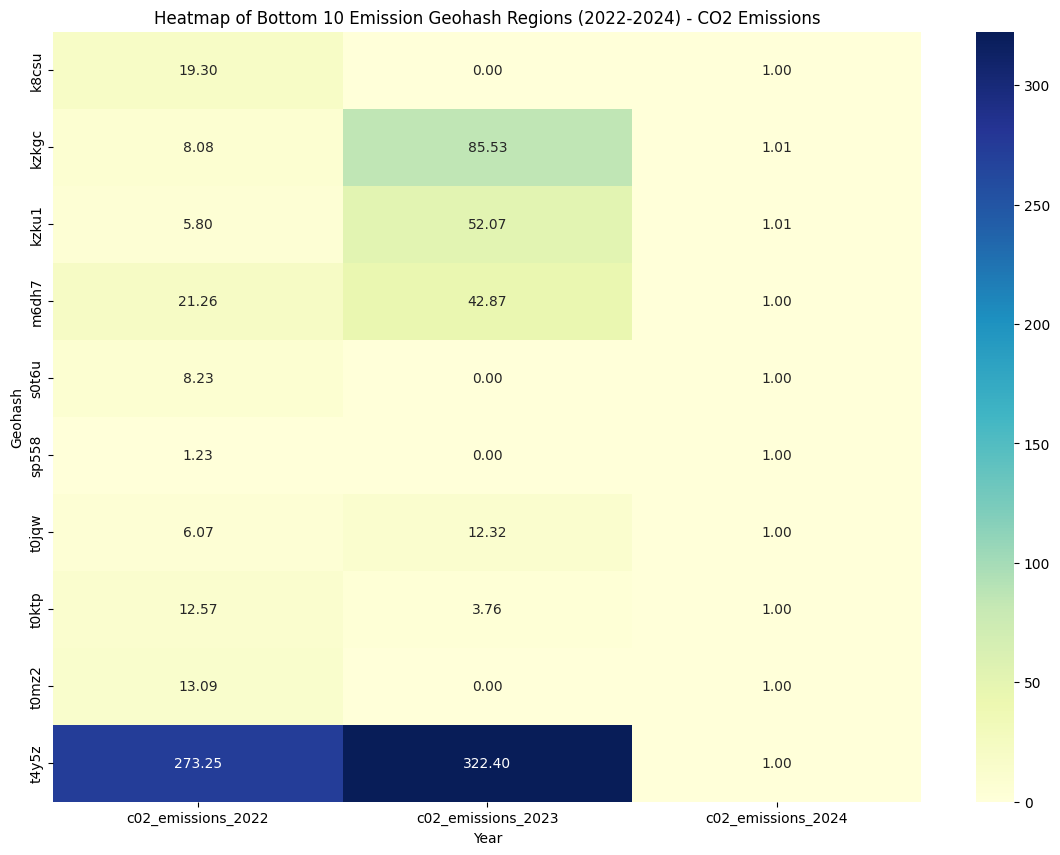

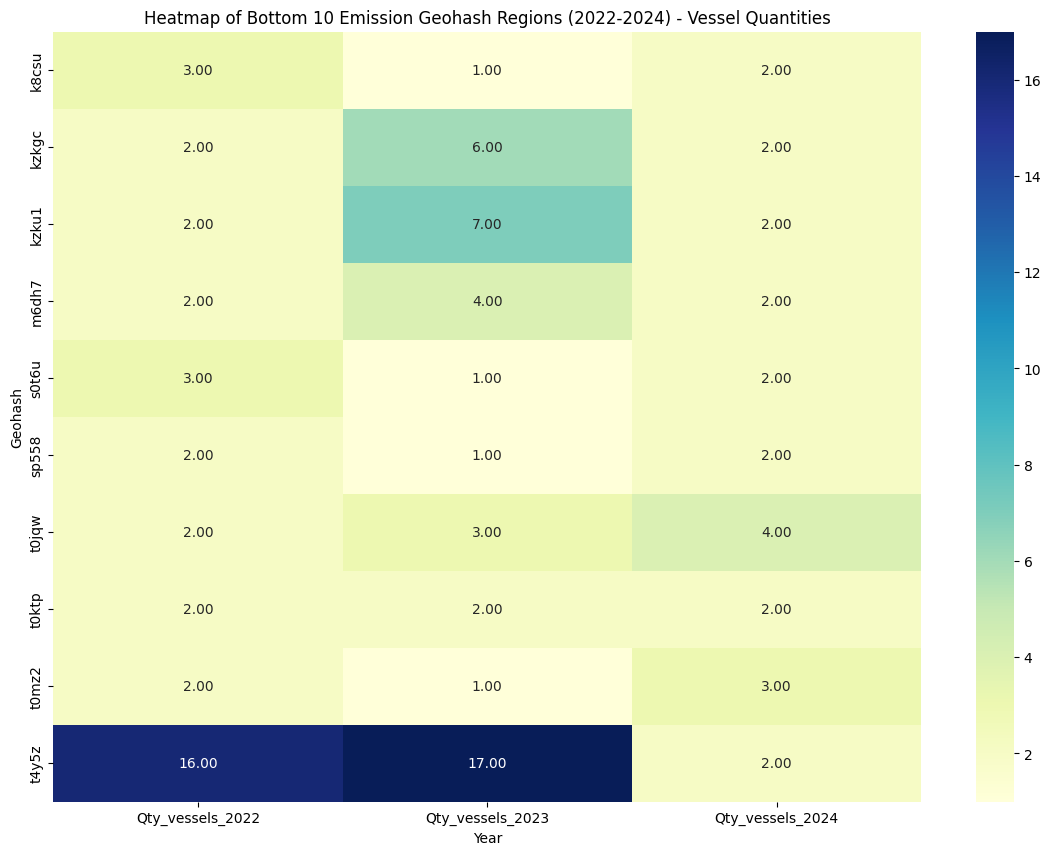

In [26]:
# Filter out geohashes where CO2 emissions are ≤ 1 in 2024
filtered_df = df[df['c02_emissions_2024'] > 1]

# Find bottom 10 geohashes by total emissions in 2024 from the filtered DataFrame
bottom_10 = filtered_df.nsmallest(10, 'c02_emissions_2024')

# Melt the DataFrame for heatmap plotting (CO2 Emissions)
melted_bottom_10_emissions = bottom_10.melt(id_vars='geohash', value_vars=['c02_emissions_2022', 'c02_emissions_2023', 'c02_emissions_2024'],
                                            var_name='Year', value_name='CO2 Emissions')

# Create a pivot table for CO2 Emissions
pivot_bottom_10_emissions = melted_bottom_10_emissions.pivot(index='geohash', columns='Year', values='CO2 Emissions')

# Plot heatmap for bottom 10 CO2 Emissions
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_emissions, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()

# Melt the DataFrame for heatmap plotting (Vessel Quantities)
melted_bottom_10_vessels = bottom_10.melt(id_vars='geohash', value_vars=['Qty_vessels_2022', 'Qty_vessels_2023', 'Qty_vessels_2024'],
                                          var_name='Year', value_name='Vessel Quantities')

# Create a pivot table for Vessel Quantities
pivot_bottom_10_vessels = melted_bottom_10_vessels.pivot(index='geohash', columns='Year', values='Vessel Quantities')

# Plot heatmap for bottom 10 Vessel Quantities
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_bottom_10_vessels, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Heatmap of Bottom 10 Emission Geohash Regions (2022-2024) - Vessel Quantities')
plt.xlabel('Year')
plt.ylabel('Geohash')
plt.show()